In [2]:
from datasets import load_dataset
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [18]:
df_DA_US = df_DA[df_DA['job_country'] == 'United States']

# Drop NAN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [29]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_US_top_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

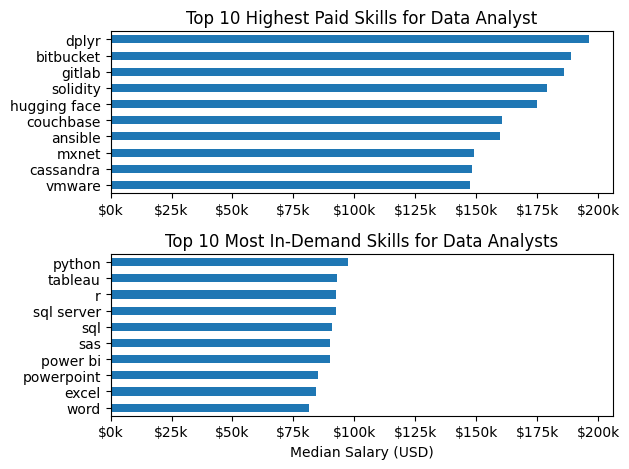

In [37]:
fig, ax = plt.subplots(2, 1)

df_DA_US_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) #[::-1] is to plot in reverse order, ascending to descending
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
df_DA_US_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()